# Policy analysis
The point of this notebook is to analyze the privacy policies fetched with the spider

In [122]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
DATADIR = "data/"
POLICY_FILE_PREFIX = "policy_"
REPORT_FILE_NAME = "crawl_report.json"

In [40]:
report_json = pd.read_json(DATADIR + REPORT_FILE_NAME)
report_json

,url,policy_domain,policy_url,policy_file,success
0,https://www.ilfattoquotidiano.it/,www.ilfattoquotidiano.it,https://www.ilfattoquotidiano.it/privacy-policy/,policy_www.ilfattoquotidiano.it,True
1,https://www.wikipedia.org/,meta.wikimedia.org,https://meta.wikimedia.org/wiki/Privacy_policy,policy_www.wikipedia.org,True
2,https://www.repubblica.it/,None,None,policy_www.repubblica.it,False
3,https://www.3bmeteo.com/,None,None,policy_www.3bmeteo.com,False
4,https://www.facebook.com/?_fb_noscript=1,www.facebook.com,https://www.facebook.com/privacy/policy/?entry...,policy_www.facebook.com,False
...,...,...,...,...,...
76,https://www.iliad.it/,www.iliad.it,https://www.iliad.it/docs/informativa_privacy/...,policy_www.iliad.it,True
77,https://www.idealista.it/,www.idealista.it,https://www.idealista.it/assistenzautenti/arti...,policy_www.idealista.it,True
78,https://www.dailyfx.com/,www.dailyfx.com,https://www.dailyfx.com/news/gbp-usd-outlook-g...,policy_www.dailyfx.com,True
79,https://www.paypal.com/it/home,www.paypal.com,https://www.paypal.com/privacy-center,policy_www.paypal.com,True


In [105]:
# Recap
number_total = len(report_json)
print("Analyzed sites: " + str(number_total))

successful = report_json.loc[report_json["success"] == True]
number_successful = len(successful)
print("Successfully analyzed: " + str(number_successful))

print("Success rate: " + str(round((100 * number_successful / number_total), 1)) + "%")

failed_with_url = report_json.loc[pd.notna(report_json["policy_url"])
                                  & (report_json["success"] == False)]
print("Policy url found but failed: " + str(len(failed_with_url)))
failed_with_url

Analyzed sites: 81
Successfully analyzed: 58
Success rate: 71.6%
Policy url found but failed: 1


,url,policy_domain,policy_url,policy_file,success
4,https://www.facebook.com/?_fb_noscript=1,www.facebook.com,https://www.facebook.com/privacy/policy/?entry...,policy_www.facebook.com,False


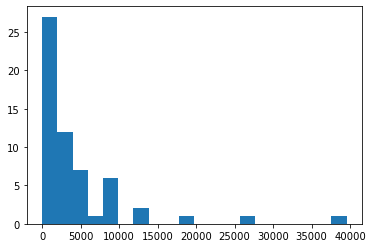

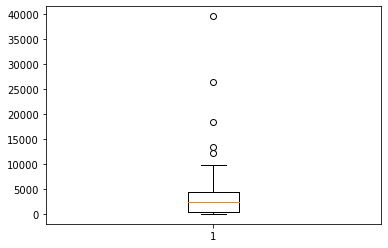

In [161]:
# Simple analysis i.e. wordcount
# Open policy files
policy_file_names = successful["policy_file"].tolist()

policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename + ".txt")) # .txt will be included in policy_file in the future


wordcounts = []
for file in policy_files:
    wordcounts.append(len(file.read().split()))

plt.hist(wordcounts, 20)
plt.show()
plt.boxplot(wordcounts)
plt.show()